In [1]:
import pandas as pd
import numpy as np
import math
import time
import random
import re
from PIL import Image
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
from libsvm.svmutil import *
from pathlib import Path

In [5]:
class0 = list()
path0 = 'svm/train/1/'
for image in Path(path0).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    class0.append(image_resized)
label0 = np.array(class0) 

class1 = list()
path1 = 'svm/train/2/'
for image in Path(path1).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    class1.append(image_resized)
label1 = np.array(class1) 

In [6]:
y0 = np.full((2380, 1), fill_value=-1, dtype='double')
y1 = np.ones((2380, 1), dtype='double')
y = np.concatenate((y0, y1))

x = np.concatenate((label0, label1))

In [7]:
P = np.empty((4760, 4760), dtype='double')
for i in range(0, 4760):
    for j in range(0, 4760):
        P[i][j] = y[i][0]*y[j][0]*(np.dot(x[i], x[j]))

q = np.full((4760, 1), fill_value=-1, dtype='double')
c = 1
G = np.concatenate((np.identity(4760, dtype='double'), np.identity(4760, dtype='double')*(-1)))
h = np.concatenate((np.full((4760, 1), fill_value=c, dtype='double'), np.zeros((4760, 1), dtype='double')))
A = y.reshape((1, 4760))
b = np.zeros((1,1), dtype='double')

print(P)
print(q)
print(G)
print(h)
print(A)
print(b)

[[  45.90428297   60.21933103   56.85930027 ... -132.74145329
  -107.20410611  -81.70445213]
 [  60.21933103  121.15460208  100.83178777 ... -212.41603998
  -178.64819685 -142.97233372]
 [  56.85930027  100.83178777   99.50083814 ... -206.11993849
  -170.53284121 -134.22921953]
 ...
 [-132.74145329 -212.41603998 -206.11993849 ...  507.66560554
   383.95672434  298.77554787]
 [-107.20410611 -178.64819685 -170.53284121 ...  383.95672434
   340.25845444  250.63240292]
 [ -81.70445213 -142.97233372 -134.22921953 ...  298.77554787
   250.63240292  208.23278739]]
[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [-0. -0. -0. ... -1. -0. -0.]
 [-0. -0. -0. ... -0. -1. -0.]
 [-0. -0. -0. ... -0. -0. -1.]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
[[-1. -1. -1. ...  1.  1.  1.]]
[[0.]]


In [8]:
sol = solvers.qp(matrix(P), matrix(q), matrix(G), matrix(h), matrix(A), matrix(b))

     pcost       dcost       gap    pres   dres
 0: -1.0702e+03 -1.2770e+04  8e+04  3e+00  6e-11
 1: -6.9557e+02 -8.2137e+03  2e+04  5e-01  6e-11
 2: -5.0253e+02 -3.0365e+03  4e+03  1e-01  4e-11
 3: -4.2362e+02 -1.4260e+03  2e+03  4e-02  3e-11
 4: -4.0736e+02 -7.9124e+02  5e+02  1e-02  3e-11
 5: -4.2288e+02 -5.9686e+02  2e+02  3e-03  3e-11
 6: -4.3902e+02 -5.2266e+02  9e+01  9e-04  3e-11
 7: -4.5187e+02 -4.8658e+02  4e+01  2e-04  3e-11
 8: -4.5792e+02 -4.7195e+02  1e+01  1e-05  4e-11
 9: -4.6217e+02 -4.6600e+02  4e+00  3e-06  4e-11
10: -4.6352e+02 -4.6415e+02  6e-01  2e-13  4e-11
11: -4.6380e+02 -4.6383e+02  3e-02  2e-14  4e-11
12: -4.6381e+02 -4.6381e+02  8e-04  2e-13  4e-11
13: -4.6381e+02 -4.6381e+02  1e-05  3e-14  4e-11
Optimal solution found.


In [9]:
optimal_alpha = np.array(sol['x'])
print(optimal_alpha[optimal_alpha<0.0001].shape)

(4090,)


In [11]:
alpha = np.where(optimal_alpha<0.0001, 0, optimal_alpha)
print(np.count_nonzero(alpha))
print(np.count_nonzero(alpha)/4760)

670
0.1407563025210084


In [12]:
temp = np.empty((4760, 768))
for i in range(0, 4760):
    temp[i,:] = alpha[i][0]*y[i][0]*x[i,:]
w = np.asarray(np.sum(temp, axis=0)).reshape(768, 1)
print(w)

[[ 5.15468259e-01]
 [ 1.67671958e-01]
 [ 3.31204687e-01]
 [-3.91642617e-01]
 [-2.54407833e-01]
 [ 3.68779837e-01]
 [ 2.09641745e-01]
 [-5.12967409e-03]
 [ 4.64979896e-01]
 [-6.19812816e-01]
 [-8.15020064e-01]
 [-1.02011675e-01]
 [-7.65535267e-03]
 [-1.67144453e-01]
 [ 8.93493173e-01]
 [ 1.61969874e-01]
 [-2.35438172e-01]
 [ 1.09602757e-01]
 [ 5.72874033e-01]
 [-8.19886074e-02]
 [-7.59872665e-02]
 [-2.14829154e-01]
 [-5.37816988e-01]
 [-1.66568857e-01]
 [ 4.83353177e-02]
 [-3.92531824e-01]
 [ 6.26993320e-02]
 [ 4.83923352e-01]
 [-7.78512112e-02]
 [ 4.30973959e-01]
 [ 3.10859494e-01]
 [-3.45492539e-01]
 [ 3.25476797e-01]
 [-2.16084212e-01]
 [-8.14303460e-01]
 [-1.83591606e-01]
 [ 1.79727676e-01]
 [ 1.26406316e-01]
 [ 5.53218497e-01]
 [-8.08805244e-02]
 [-1.43676663e-01]
 [ 7.77168321e-01]
 [-4.03739910e-01]
 [-4.02437070e-01]
 [ 8.50179820e-01]
 [ 4.02219910e-02]
 [-1.22575195e-01]
 [ 5.41435515e-01]
 [-3.68084216e-01]
 [-4.32260629e-01]
 [ 2.79056160e-01]
 [-1.02519519e-01]
 [-5.7491267

In [19]:
all_b = np.asarray(x@w)
b = -0.5*(np.max(all_b[np.where(y==-1) and np.where(alpha!=0)], axis=0) + np.min(all_b[np.where(y==1) and np.where(alpha!=0)], axis=0))
print(b)

-3.780827543615603


In [20]:
vclass0 = list()
vpath0 = 'svm/val/1/'
for image in Path(vpath0).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    vclass0.append(image_resized)
vlabel0 = np.array(vclass0) 

vclass1 = list()
vpath1 = 'svm/val/2/'
for image in Path(vpath1).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    vclass1.append(image_resized)
vlabel1 = np.array(vclass1)

vy0 = np.full((vlabel0.shape[0], 1), fill_value=-1, dtype='double')
vy1 = np.ones((vlabel1.shape[0], 1), dtype='double')
vy = np.concatenate((vy0, vy1))

vx = np.concatenate((vlabel0, vlabel1))

In [21]:
y_pred = list()
for i in range(0, vy.shape[0]):
    val = 1 if(vx[i]@w + b)>0 else (-1)
    y_pred.append(val)

count = 0
for i in range(0, vy.shape[0]):
    count = count+1 if(vy[i][0]==y_pred[i]) else count
accuracy = count/len(y_pred)
print(accuracy)

0.935


svm/train/1/10007.jpg


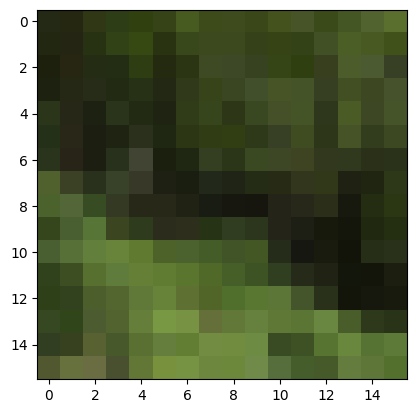

svm/train/2/14923.jpg


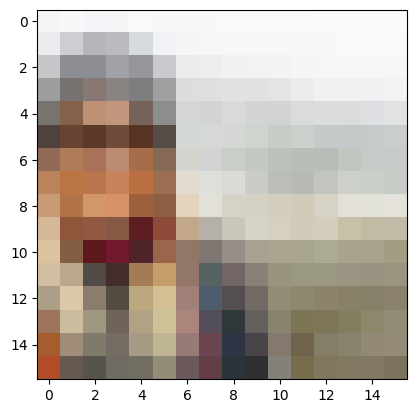

svm/train/2/14946.jpg


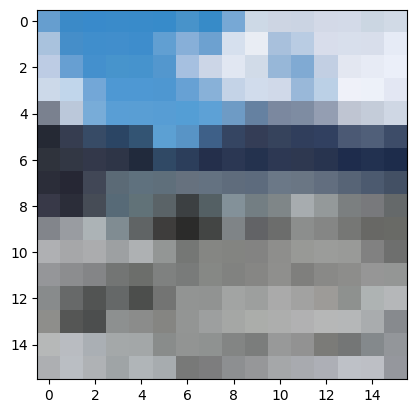

svm/train/2/1496.jpg


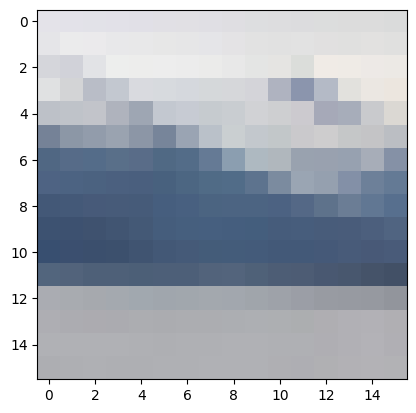

svm/train/2/14964.jpg


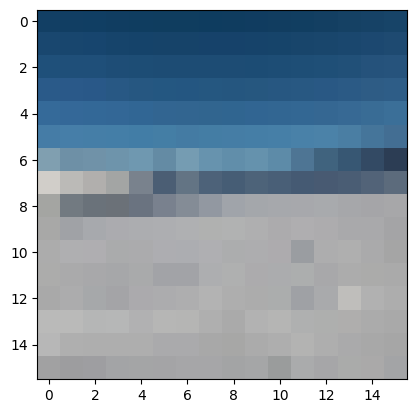

svm/train/2/1497.jpg


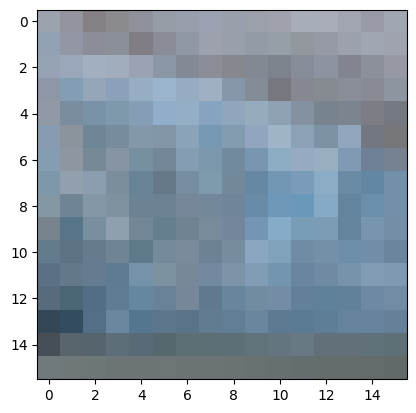

In [22]:
image_names = list()
path0 = 'svm/train/1/'
for image in Path(path0).glob('*.jpg'):
    image_names.append(image)
path1 = 'svm/train/2/'
for image in Path(path1).glob('*.jpg'):
    image_names.append(image)

image_name = np.asarray(image_names)

indices = np.array(alpha.reshape((4760,)).argsort()[:6]).reshape((6, 1))
for i in range(0, indices.shape[0]):
    image = str(image_name[indices[i]]).split('\'')[1]
    print(image)
    img = Image.open(image, mode='r').resize((16, 16))
    plt.imshow(img)
    plt.show()

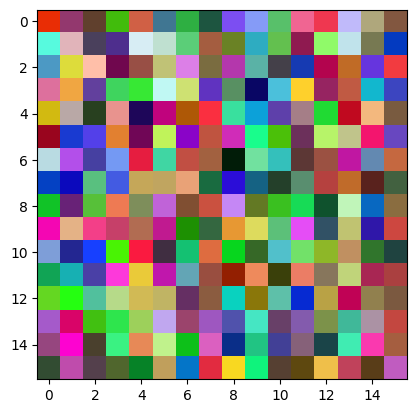

In [17]:
w_unnormalised = w.reshape((16,16,3))*255
img = Image.fromarray(w_unnormalised, 'RGB')
plt.imshow(img)
plt.show()

In [23]:
print(np.asarray(alpha.reshape(4760, )!=0).nonzero())

(array([  18,   23,   24,   25,   28,   31,   35,   43,   50,   56,   57,
         68,   72,   81,   85,   96,  102,  110,  113,  125,  129,  140,
        146,  147,  153,  155,  157,  167,  169,  181,  187,  203,  204,
        206,  246,  249,  255,  260,  272,  275,  277,  282,  284,  299,
        307,  325,  364,  381,  382,  387,  396,  402,  418,  419,  421,
        435,  438,  439,  453,  454,  456,  458,  474,  486,  491,  497,
        511,  516,  518,  523,  538,  545,  552,  553,  562,  566,  569,
        571,  588,  591,  598,  605,  615,  621,  629,  631,  635,  640,
        650,  651,  689,  690,  697,  701,  705,  740,  747,  750,  755,
        774,  787,  791,  796,  817,  821,  822,  826,  830,  839,  865,
        866,  874,  877,  880,  888,  891,  892,  893,  901,  904,  905,
        908,  913,  916,  917,  922,  926,  927,  933,  937,  939,  946,
        960,  963,  965,  971,  972,  973,  987,  999, 1014, 1020, 1040,
       1045, 1052, 1064, 1094, 1096, 1098, 1103, 1